In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.utils import shuffle
from sklearn.preprocessing import scale

In [3]:
plt.rcParams['figure.figsize'] = [6,6]
sns.set_context('talk')
sns.set_style('whitegrid')

In [12]:
def display_cluster(X,km=[],cluster=0):
    color = 'brgcmyk'
    alpha = 0.5
    s = 20
    plt.gca().set_aspect('equal')
    if cluster==0:
        plt.scatter(X[:,0],X[:,1],c=color[0],alpha=alpha,s=s)
    else:
        for i in range(cluster):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c=color[i],alpha=alpha,s=s)
            plt.scatter(km.cluster_centers_[0],km.cluster_centers_[1],c=color[i],marker='x',s=s)

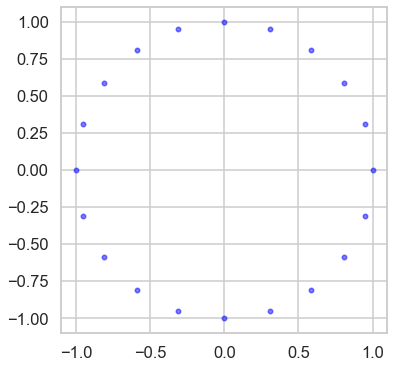

In [13]:
angle = np.linspace(0,2*np.pi,20,endpoint=False)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
display_cluster(X)

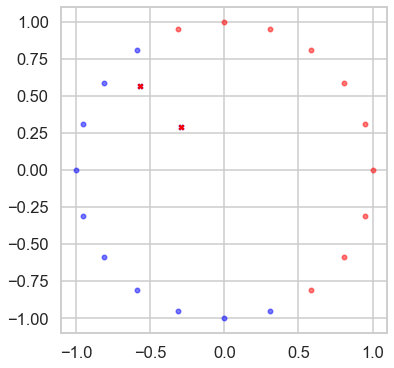

In [15]:
n_cluster = 2
km = KMeans(n_clusters=n_cluster,random_state=10,n_init=1)
km.fit(X)
display_cluster(X,km,n_cluster)

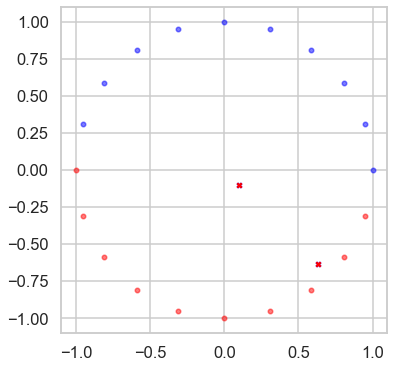

In [16]:
km = KMeans(n_clusters=n_cluster,random_state=20,n_init=1)
km.fit(X)
display_cluster(X,km,n_cluster)

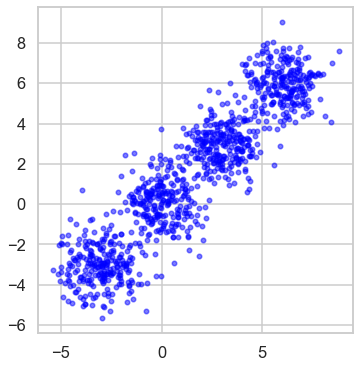

In [19]:
n_sample = 1000
n_bin = 4
center = [(-3,-3),(0,0),(3,3),(6,6)]
X,y = make_blobs(n_samples=n_sample,n_features=2,cluster_std=1.0,shuffle=False,centers=center)
display_cluster(X)

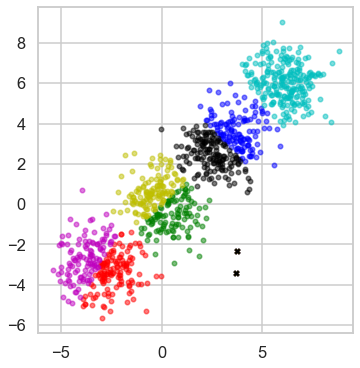

In [20]:
n_cluster = 7
km = KMeans(n_clusters=n_cluster)
km.fit(X)
display_cluster(X,km,n_cluster)

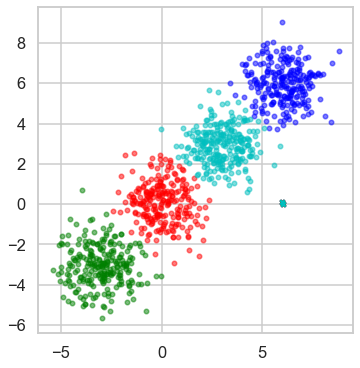

In [21]:
n_cluster = 4
km = KMeans(n_clusters=n_cluster)
km.fit(X)
display_cluster(X,km,n_cluster)

In [22]:
km.inertia_

1874.7825230328242

Text(0, 0.5, 'Inertia')

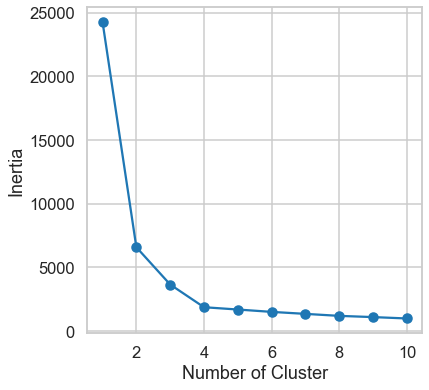

In [25]:
inertia = []
num = list(range(1,11))
for i in num:
    km = KMeans(n_clusters=i)
    km.fit(X)
    inertia.append(km.inertia_)
    
plt.plot(num,inertia)
plt.scatter(num,inertia)
plt.xlabel('Number of Cluster')
plt.ylabel('Inertia')

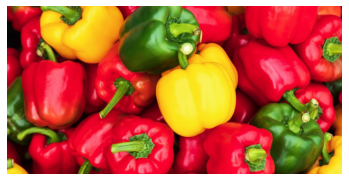

In [27]:
img = plt.imread('E:\Machine Learning Course\Course4\pepper.jpg')
plt.imshow(img)
plt.axis('off');

In [29]:
img.shape

(600, 1200, 3)

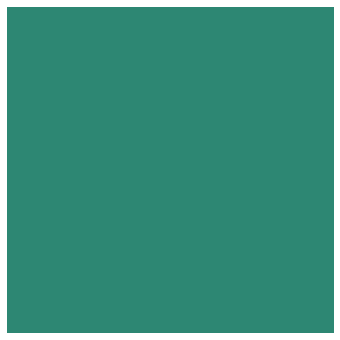

In [34]:
R = 45
G = 135
B = 115
plt.imshow([[np.array([R,G,B]).astype('uint8')]])
plt.axis('off');

In [38]:
img_flat = img.reshape(img.shape[0]*img.shape[1],3)
img_flat[:5,:]

array([[167,   0,  24],
       [169,   0,  26],
       [171,   1,  27],
       [174,   2,  26],
       [175,   3,  25]], dtype=uint8)

In [39]:
img_flat.shape

(720000, 3)

In [40]:
kmeans = KMeans(n_clusters=8,random_state=0).fit(img_flat)

In [42]:
img_flat2 = img_flat.copy()

for i in np.unique(kmeans.labels_):
    img_flat2[kmeans.labels_==i,:] = kmeans.cluster_centers_[i]

In [43]:
img_flat2

array([[147,  10,  20],
       [147,  10,  20],
       [147,  10,  20],
       ...,
       [249, 221,  43],
       [249, 221,  43],
       [249, 221,  43]], dtype=uint8)

In [44]:
def image_cluster(img,k):
    img_flat = img.reshape(img.shape[0]*img.shape[1],3)
    kmeans = KMeans(n_clusters=k,random_state=0).fit(img_flat)
    img_flat2 = img_flat.copy()
    
    for i in np.unique(kmeans.labels_):
        img_flat2[kmeans.labels_==i,:] = kmeans.cluster_centers_[i]
        
    img2 = img_flat2.reshape(img.shape)
    return img2,kmeans.inertia_

In [45]:
k_vals = list(range(2,21,2))
img_list = []
inertia = []
for k in k_vals:
    img2,ine = image_cluster(img,k)
    img_list.append(img2)
    inertia.append(ine)

Text(0, 0.5, 'inertia')

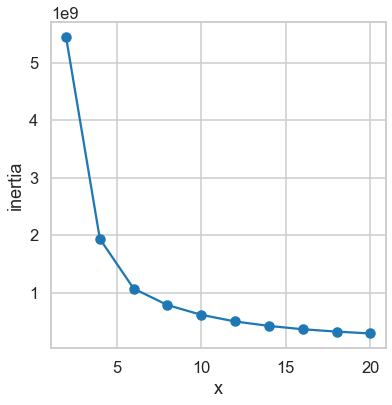

In [46]:
plt.plot(k_vals,inertia)
plt.scatter(k_vals,inertia)
plt.xlabel('x')
plt.ylabel('inertia')

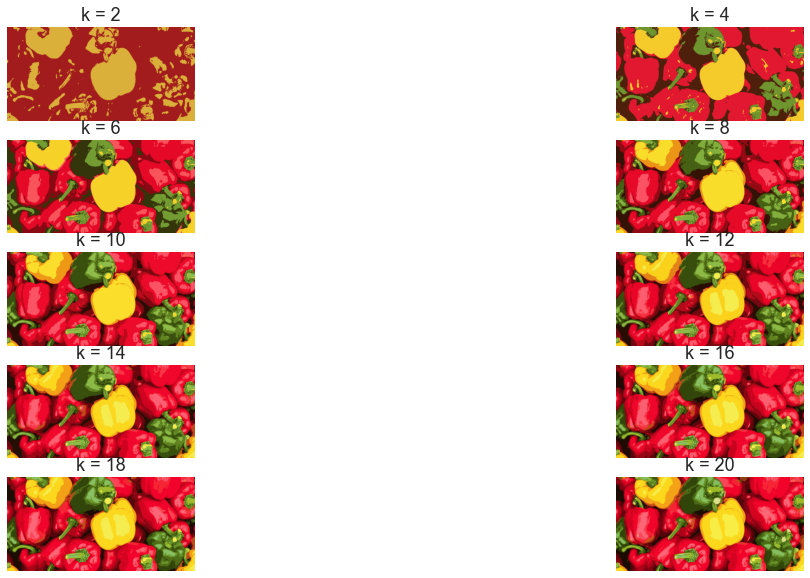

In [49]:
plt.figure(figsize=(20,10))
for i in range(len(k_vals)):
    plt.subplot(5,2,i+1)
    plt.imshow(img_list[i])
    plt.title('k = '+str(k_vals[i]))
    plt.axis('off');

In [52]:
len(np.unique(img_flat,axis=0))

179507